In [ ]:
# To Import DataSet From Kaggle
! pip install kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download andrewmvd/trip-advisor-hotel-reviews/download


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
 97% 5.00M/5.14M [00:00<00:00, 50.5MB/s]
100% 5.14M/5.14M [00:00<00:00, 51.4MB/s]


In [ ]:
! unzip trip-advisor-hotel-reviews.zip 

Archive:  trip-advisor-hotel-reviews.zip
  inflating: tripadvisor_hotel_reviews.csv  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing All Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import re
import os
from pprint import pprint
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
!pip install num2words 
import num2words
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 7.8 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=880ce0ca4d72e9b2518a2e9e817f796d6075381762a5a0ef66d60c49fa1efdb9
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

**Exploring Dataset**

In [ ]:
trip = pd.read_csv("tripadvisor_hotel_reviews.csv")
trip.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# To check Dataset attributes
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

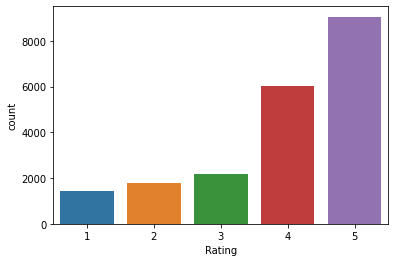

In [ ]:
sns.countplot(trip.Rating)
trip.Rating.value_counts()

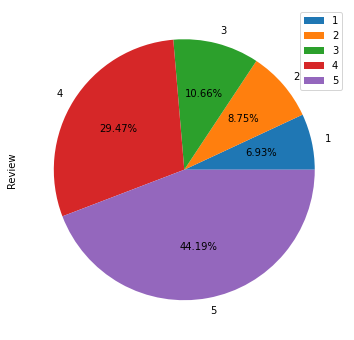

In [ ]:
trip.groupby("Rating").count().plot.pie(y="Review",autopct="%.2f%%",figsize=(6,6))

In [ ]:
trip['Word_count']= trip['Review'].map(lambda x: len(x.split()))

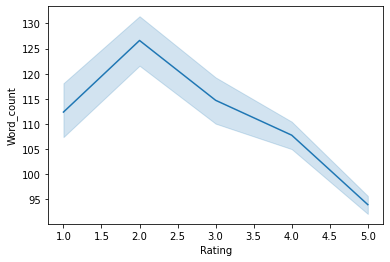

In [ ]:
sns.lineplot(x='Rating', data=trip, y='Word_count')

In [ ]:
# To check Missing value
trip.isnull().sum()

Review        0
Rating        0
Word_count    0
dtype: int64

In [ ]:
# To check Duplication 
trip.Review.duplicated().sum()

0

**Data Preparation/Pre-Processing**

In [ ]:
def clean_reviews(text):

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)
    text = text.replace("*","star")


    # Replace number with strings
    text = re.sub(r"(\d+)", lambda x: num2words.num2words(int(x.group(0))), text)

    # Remove stop words
    text = text.split()
    my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'if', 'or',  'as', 'while', 'of', 'at', 'by', 'for',  'into', 'to', 'from', 'in', 'out', 'on', 'off', 'then', 'once', 'here', 'there', 'all', 'any', 's', 't', 'can', 'will', 'just', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']
    my_stopwords = my_stopwords + ['hi', 'im']

    text_filtered = [word for word in text if not word in my_stopwords]
    text_filtered = ' '.join([str(item) for item in text_filtered])

    
    #Lemmatize Text
    lem = WordNetLemmatizer()
    text_lemmed = lem.lemmatize(text_filtered) 

    # remove special characters
    text_lemmed = re.sub('[-!@#$Ã‡_Ãã©]', ' ', text_lemmed)

    return text_lemmed

In [ ]:
text = "I hasn't the 421 store yesterday."

text = clean_reviews(text)
print(text)

hasn't four hundred twenty one store yesterday.


In [ ]:
text1 = "__Ã‡_Ã©_ offer help, got garment bag suitcase came car key room number says not valet"

In [ ]:
text1 = clean_reviews(text1)
print(text1)

         offer help, got garment bag suitcase came car key room number says not valet


In [ ]:
text2 = "nice rooms not 4* experience hotel monaco seattle good hotel n't 4* level"
text2 = clean_reviews(text2)
print(text2)

nice rooms not fourstar experience hotel monaco seattle good hotel n't fourstar level


In [ ]:
text3 = "arrived late evening took advice previous reviews did valet parking"
text3 = clean_reviews(text3)
print(text3)

arrived late evening took advice previous reviews valet parking


In [ ]:
trip['clean_reviews'] = trip['Review'].apply(lambda x: clean_reviews(x))
trip.head()

,Review,Rating,Word_count,clean_reviews
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,250,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,217,nice rooms not fourstar experience hotel monac...
3,"unique, great stay, wonderful time hotel monac...",5,89,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,191,"great stay great stay, went seahawk game aweso..."


In [ ]:
rev= " ".join([review for review in trip['clean_reviews']])
rev[:2000]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay forty parking night, ok nothing special charge diamond member hilton decided chain shot twentyth anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls s

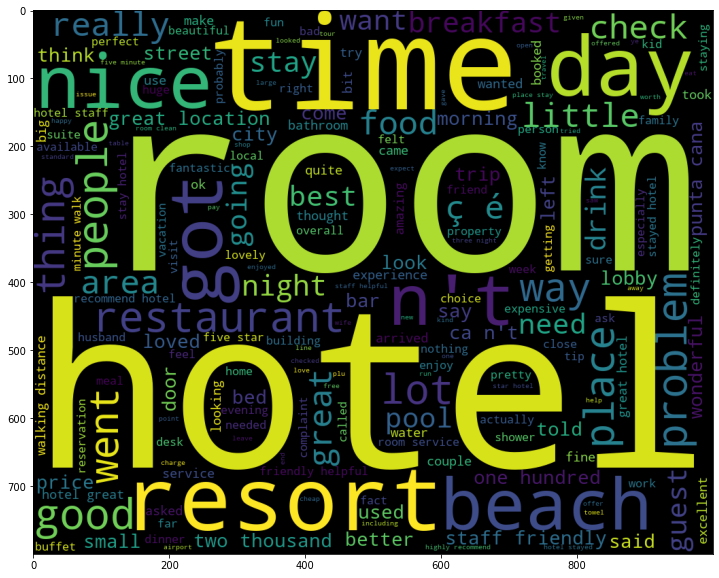

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev)
plt.imshow(wc)

In [ ]:
# Top 10000 Reviews 
trip_10000= trip[0:10000]


**Aspect Extraction using LDA**

In [ ]:


# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = trip_10000.clean_reviews.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet', 'parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'non', 'existent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'noisy', 'neighbors', 'aveda', 'bath', 'products', 'nice', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking', 'distance', 'shopping', 'overall', 'nice', 'experience', 'pay', 'forty', 'parking', 'night']]


In [ ]:
!python3 -m spacy download en

2022-08-19 09:00:21.246715: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 1.1 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)



In [ ]:
# !python3 -m spacy download en  # run in terminal once
def process_words(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc))] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    #texts_out = []
    #nlp = spacy.load("en_core_web_sm")   
    return texts

data_ready = process_words(data_words)  # processed Text Data!

In [ ]:
print(data_ready[:1])

[['nice', 'hotel', 'expensive', 'parking', 'got', 'good', 'deal', 'stay', 'hotel', 'anniversary', 'arrived', 'late', 'evening', 'took', 'advice', 'previous', 'reviews', 'valet_parking', 'check', 'quick', 'easy', 'little', 'disappointed', 'non_existent', 'view', 'room', 'room', 'clean', 'nice', 'size', 'bed', 'comfortable', 'woke', 'stiff', 'neck', 'high', 'pillows', 'not', 'soundproof', 'like', 'heard', 'music', 'room', 'night', 'morning', 'loud', 'bangs', 'doors', 'opening', 'closing', 'hear', 'people', 'talking', 'hallway', 'maybe', 'noisy', 'neighbors', 'aveda', 'bath_products', 'nice', 'not', 'goldfish', 'stay', 'nice', 'touch', 'taken', 'advantage', 'staying', 'longer', 'location', 'great', 'walking_distance', 'shopping', 'overall', 'nice', 'experience', 'pay', 'forty', 'parking', 'night']]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.021*"visit" + 0.020*"airport" + 0.017*"extremely" + 0.016*"fantastic" + '
  '0.014*"looking" + 0.014*"six" + 0.014*"year" + 0.014*"centre" + '
  '0.013*"wife" + 0.013*"included"'),
 (1,
  '0.048*"ok" + 0.025*"european" + 0.023*"mins" + 0.017*"bedroom" + '
  '0.016*"didnt" + 0.014*"choose" + 0.013*"tidy" + 0.013*"april" + '
  '0.011*"super" + 0.010*"steps"'),
 (2,
  '0.037*"metro" + 0.034*"lovely" + 0.030*"shower" + 0.026*"euros" + '
  '0.023*"main" + 0.022*"area" + 0.020*"bathroom" + 0.017*"hot" + 0.017*"tv" + '
  '0.016*"coffee"'),
 (3,
  '0.107*"hotel" + 0.033*"room" + 0.032*"location" + 0.030*"good" + '
  '0.026*"breakfast" + 0.026*"stay" + 0.026*"great" + 0.025*"staff" + '
  '0.024*"rooms" + 0.020*"clean"'),
 (4,
  '0.080*"close" + 0.045*"door" + 0.020*"it" + 0.020*"quality" + '
  '0.016*"advice" + 0.016*"english" + 0.015*"italy" + 0.013*"lift" + '
  '0.011*"hour" + 0.011*"old"'),
 (5,
  '0.021*"tiny" + 0.015*"end" + 0.013*"money" + 0.012*"recommended" + '
  '0.012*"engli

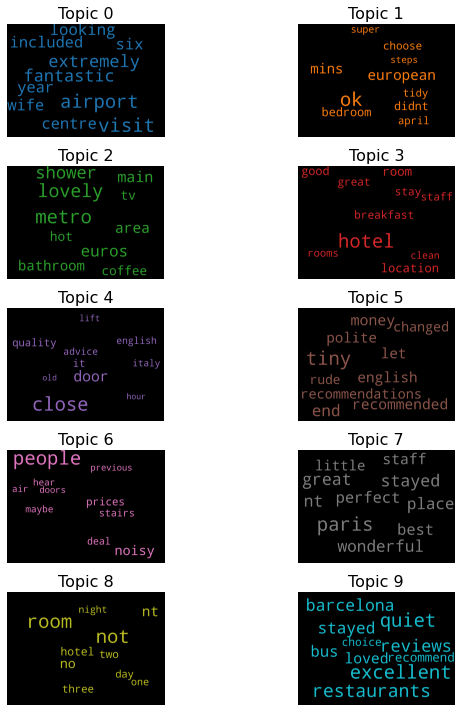

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**TOP 5 Aspects from the Topics identified by LDA**



1.   Room
2.   Location
3.   Staff
4.   Food
5.   Amenities

**Aspect Extraction using LSA**

In [ ]:
vectorizer = TfidfVectorizer(max_features= 50000, # keep top 50000 terms 
min_df = 25, 
smooth_idf=True)

X = vectorizer.fit_transform(trip_10000['clean_reviews'])

In [ ]:
X.shape

(10000, 3685)

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
lsa_model.fit(X)
len(lsa_model.components_)


10

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print("\n")


Topic 0: 
hotel room not great good stay staff location nice rooms 

Topic 1: 
resort beach food not pool people vacation water time cana 

Topic 2: 
great resort beach staff location wonderful friendly helpful food loved 

Topic 3: 
great nice parking san place free car seattle juan street 

Topic 4: 
good station walk breakfast value clean five train two metro 

Topic 5: 
hotel san juan old not francisco car parking beach star 

Topic 6: 
two five hundred one twenty thousand wonderful walk four three 

Topic 7: 
nice san juan room beach pool lovely the area old 

Topic 8: 
great hotel room view beach service pool nice star stayed 

Topic 9: 
excellent service good san value resort francisco location juan comfortable 



In [ ]:
Topics = []
for i, comp in enumerate(lsa_model.components_):
    terms_comp = zip(terms, comp)
    st=''
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    for t in sorted_terms:
        st = st + t[0] + " "
    Topics.append(st)
Topics

['hotel room not great good stay staff location nice rooms ',
 'resort beach food not pool people vacation water time cana ',
 'great resort beach staff location wonderful friendly helpful food loved ',
 'great nice parking san place free car seattle juan street ',
 'good station walk breakfast value clean five train two metro ',
 'hotel san juan old not francisco car parking beach star ',
 'two five hundred one twenty thousand wonderful walk four three ',
 'nice san juan room beach pool lovely the area old ',
 'great hotel room view beach service pool nice star stayed ',
 'excellent service good san value resort francisco location juan comfortable ']

In [ ]:
Topics_No =['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8','Topic 9' ]

In [ ]:
dct = zip(Topics_No, Topics)

In [ ]:
output_dict = dict(dct)
print(output_dict)

{'Topic 0': 'hotel room not great good stay staff location nice rooms ', 'Topic 1': 'resort beach food not pool people vacation water time cana ', 'Topic 2': 'great resort beach staff location wonderful friendly helpful food loved ', 'Topic 3': 'great nice parking san place free car seattle juan street ', 'Topic 4': 'good station walk breakfast value clean five train two metro ', 'Topic 5': 'hotel san juan old not francisco car parking beach star ', 'Topic 6': 'two five hundred one twenty thousand wonderful walk four three ', 'Topic 7': 'nice san juan room beach pool lovely the area old ', 'Topic 8': 'great hotel room view beach service pool nice star stayed ', 'Topic 9': 'excellent service good san value resort francisco location juan comfortable '}


hotel room not great good stay staff location nice rooms 


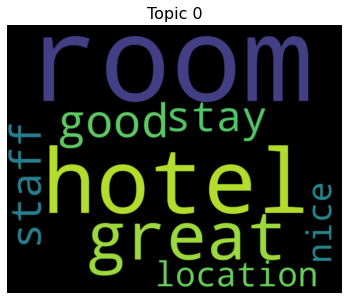

resort beach food not pool people vacation water time cana 


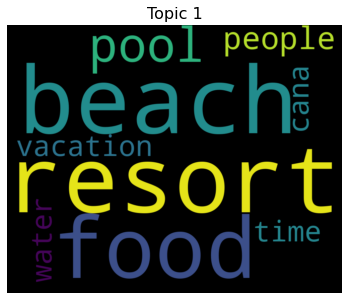

great resort beach staff location wonderful friendly helpful food loved 


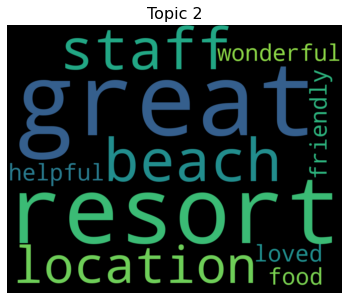

great nice parking san place free car seattle juan street 


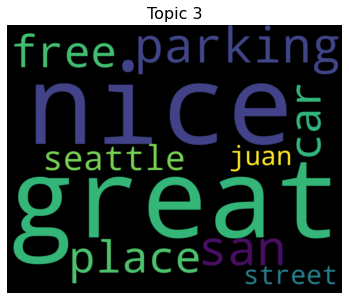

good station walk breakfast value clean five train two metro 


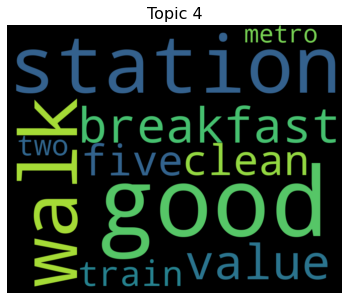

hotel san juan old not francisco car parking beach star 


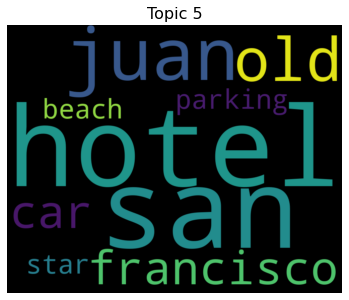

two five hundred one twenty thousand wonderful walk four three 


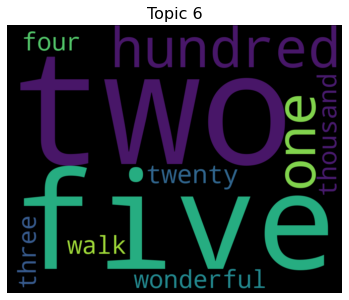

nice san juan room beach pool lovely the area old 


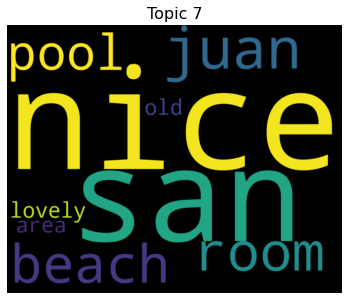

great hotel room view beach service pool nice star stayed 


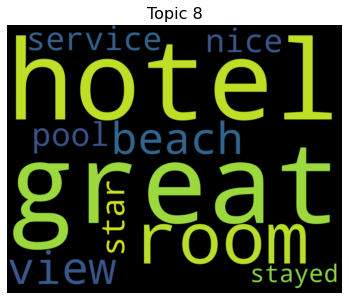

excellent service good san value resort francisco location juan comfortable 


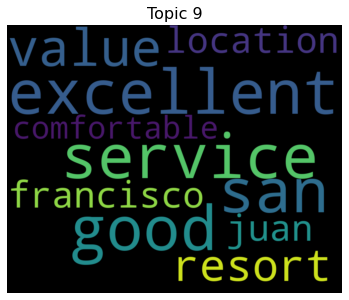

In [ ]:
for key, value in output_dict.items():
    print (value)
    wct= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(value)
    plt.figure(figsize=(6,6))
    plt.imshow(wct,interpolation='bilinear')
    plt.gca().set_title(key , fontdict=dict(size=16))
    plt.axis('off')
    plt.show()


**TOP 5 Aspects from the Topics identified by LSA**

1.   Room
2.   Food
3.   Staff
4.   Location
5.   Service

**Aspect Extraction using K-Means Clustering**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 50000,
)
tfidf.fit(trip_10000.clean_reviews)
text = tfidf.transform(trip_10000.clean_reviews)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters


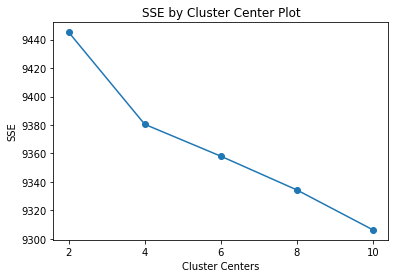

In [ ]:
def find_optimal_clusters(X, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(X).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 10)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=10, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


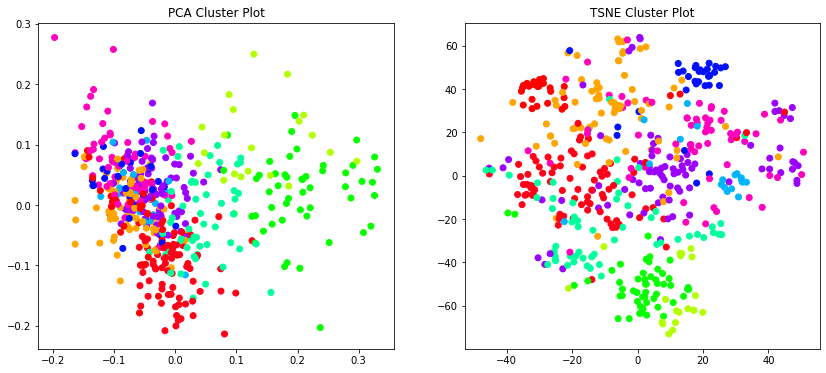

In [ ]:
def plot_tsne_pca(X, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(X.shape[0]), size=5000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(X[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(X[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=500, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)


Cluster 0
breakfast,dam,staff,canal,great,stay,location,room,hotel,amsterdam

Cluster 1
station,staff,clean,not,excellent,breakfast,location,good,room,hotel

Cluster 2
beautiful,punta,cana,excellence,vacation,not,great,beach,food,resort

Cluster 3
great,time,day,people,good,pool,food,resort,not,beach

Cluster 4
great,juan,night,stay,pool,nice,beach,not,room,hotel

Cluster 5
great,square,times,room,casablanca,sofitel,nyc,new,hotel,york

Cluster 6
rooms,great,location,room,staff,stay,london,lovely,hotel,paris

Cluster 7
place,san,service,location,great,not,room,staff,stay,hotel

Cluster 8
friendly,clean,nice,rooms,room,stay,staff,location,hotel,great

Cluster 9
bathroom,good,stay,rooms,bed,night,no,hotel,not,room


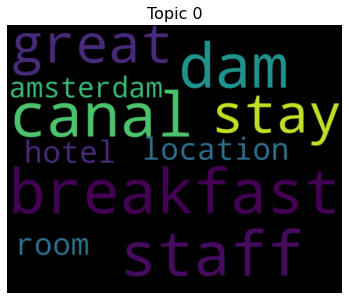

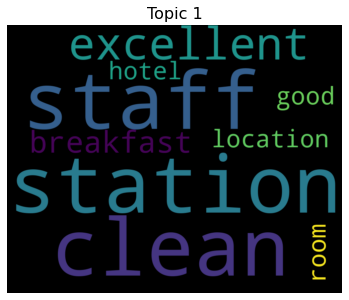

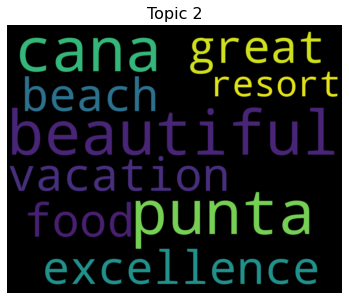

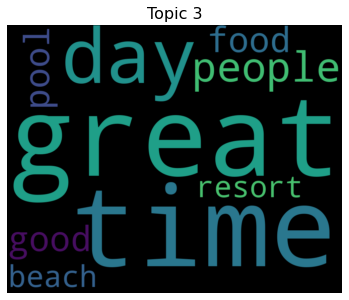

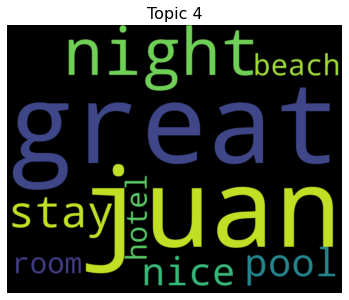

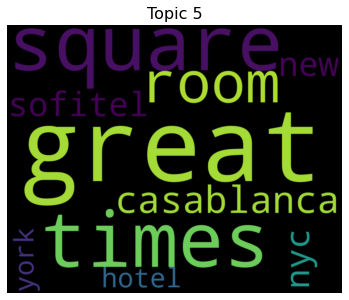

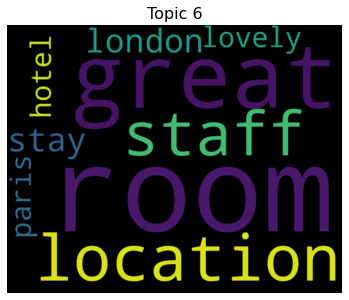

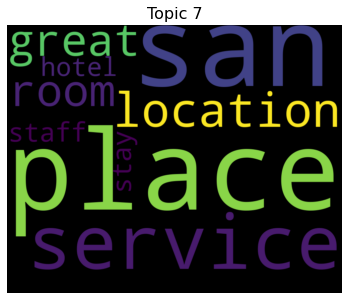

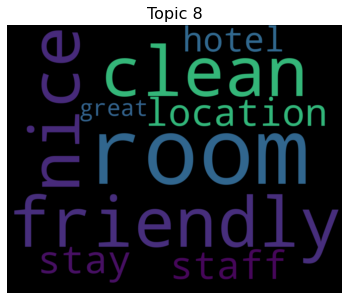

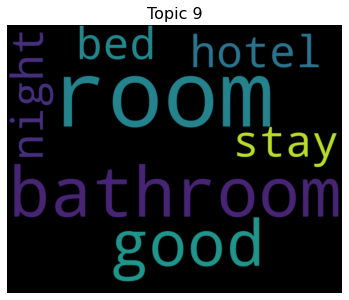

In [ ]:
def get_top_keywords(X, clusters, labels, n_terms):
    df = pd.DataFrame(X.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        cl = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
        print(cl)
        wct= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(cl)
        plt.figure(figsize=(6,6))
        plt.imshow(wct,interpolation='bilinear')
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.axis('off')
plt.show()    
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

**TOP 5 Aspects from the Topics identified by K-Means Clustering**

1.   Food
2.   Location
3.   Staff
4.   Room
5.   Service

**Aspect Extraction using POS Tagging/ Frequent Noun Words**

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm") 

In [ ]:
def tokenization(text):
  doc = nlp(text)
  tokens = []
  for token in doc:
    tokens.append(token)
  return tokens

In [ ]:
trip_10000['word'] = trip_10000['clean_reviews'].apply(lambda x: tokenization(x))

In [ ]:
def pos_tag(text):
  doc = nlp(text)
  tag =[]
  for token in doc:
    tag.append(token.pos_)
  return tag

In [ ]:
trip_10000['POS'] = trip_10000['clean_reviews'].apply(lambda x: pos_tag(x))

In [ ]:
trip_10000.head()

,Review,Rating,Word_count,clean_reviews,word,POS
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[ADJ, NOUN, ADJ, NOUN, VERB, ADJ, NOUN, VERB, ..."
1,ok nothing special charge diamond member hilto...,2,250,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[INTJ, PRON, ADJ, NOUN, NOUN, NOUN, PROPN, VER..."
2,nice rooms not 4* experience hotel monaco seat...,3,217,nice rooms not fourstar experience hotel monac...,"[nice, rooms, not, fourstar, experience, hotel...","[ADJ, NOUN, PART, VERB, NOUN, NOUN, PROPN, PRO..."
3,"unique, great stay, wonderful time hotel monac...",5,89,"unique, great stay, wonderful time hotel monac...","[unique, ,, great, stay, ,, wonderful, time, h...","[ADJ, PUNCT, ADJ, NOUN, PUNCT, ADJ, NOUN, NOUN..."
4,"great stay great stay, went seahawk game aweso...",5,191,"great stay great stay, went seahawk game aweso...","[great, stay, great, stay, ,, went, seahawk, g...","[ADJ, VERB, ADJ, NOUN, PUNCT, VERB, PROPN, PRO..."


In [ ]:
trip_10000_pos = trip_10000.explode(['POS','word'])

In [ ]:
trip_10000_pos.head()

,Review,Rating,Word_count,clean_reviews,word,POS
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,nice,ADJ
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,hotel,NOUN
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,expensive,ADJ
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,parking,NOUN
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,got,VERB


In [ ]:
trip_10000_pos_noun = trip_10000_pos[trip_10000_pos.POS == "NOUN"]

In [ ]:
trip_10000_pos_noun.head()

,Review,Rating,Word_count,clean_reviews,word,POS
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,hotel,NOUN
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,parking,NOUN
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,deal,NOUN
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,hotel,NOUN
0,nice hotel expensive parking got good deal sta...,4,87,nice hotel expensive parking got good deal sta...,anniversary,NOUN


In [ ]:
n = 10
freq = trip_10000_pos_noun['word'].value_counts().index.tolist()[:n]

In [ ]:
freq

['hotel',
 'room',
 'staff',
 'rooms',
 'location',
 'time',
 'service',
 'night',
 'day',
 'beach']

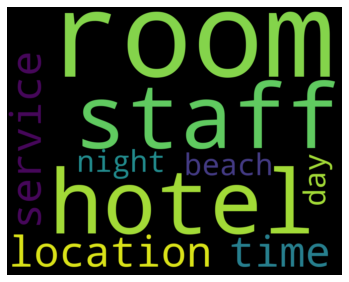

In [ ]:
    wcf= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(" ".join(freq))
    plt.figure(figsize=(6,6))
    plt.imshow(wcf,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
trip_10000_pos_noun['word'].value_counts().idxmax()

hotel

In [ ]:
trip_10000_pos_noun['word'] = trip_10000_pos_noun['word'].astype(str)

In [ ]:
freq_10 = trip_10000_pos_noun['word'].value_counts().head(10)

In [ ]:
freq_10

hotel       22059
room        16690
staff        7720
rooms        5629
location     5438
time         4815
service      4770
night        4735
day          4624
beach        4388
Name: word, dtype: int64

In [ ]:
fr1 = pd.DataFrame(data=freq_10.index, columns=['Aspects'])
fr2 = pd.DataFrame(data=freq_10.values, columns=['Count'])
fr = pd.merge(fr1, fr2, left_index=True, right_index=True)

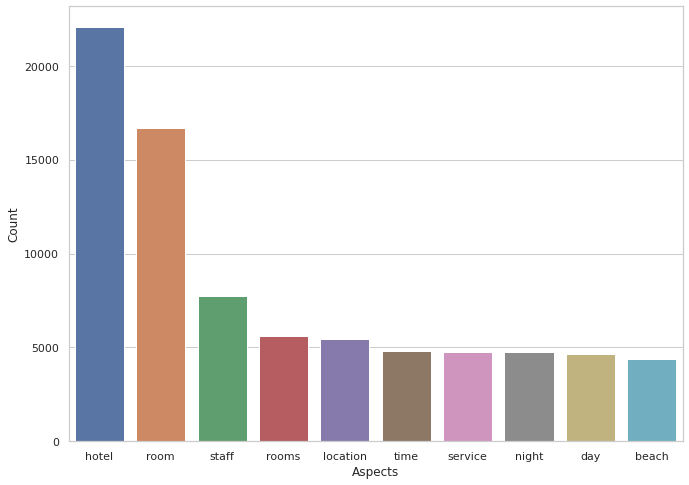

In [ ]:
sns.barplot(x = 'Aspects', y = 'Count', data = fr)
plt.show()


**TOP 5 Aspects from the Topics identified by POS Tagger/Frequent Noun Words**

1.   Room
2.   Staff
3.   Service
4.   Location
5.   Amenities

**Final 5 Common Aspects Identified from All the Aspect Extraction Methods**

1.   Room
2.   Staff
3.   Location
4.   Service
5.   Food

**Split Reviews Into Sentences**

In [ ]:
trip_1000= trip[0:1000]

In [ ]:
trip_1000 = trip_1000.drop(['Word_count'], axis=1)

In [ ]:
trip_1000.head(20)

,Review,Rating,clean_reviews
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not fourstar experience hotel monac...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."
5,love monaco staff husband stayed hotel crazy w...,5,love monaco staff husband stayed hotel crazy w...
6,"cozy stay rainy city, husband spent 7 nights m...",5,"cozy stay rainy city, husband spent seven nigh..."
7,"excellent staff, housekeeping quality hotel ch...",4,"excellent staff, housekeeping quality hotel ch..."
8,"hotel stayed hotel monaco cruise, rooms genero...",5,"hotel stayed hotel monaco cruise, rooms genero..."
9,excellent stayed hotel monaco past w/e delight...,5,excellent stayed hotel monaco past w/e delight...


In [ ]:
trip_1000['sentence_reviews'] = trip_1000['clean_reviews'].apply(lambda x: x.split(","))

In [ ]:
trip_1000_sentence = trip_1000.explode(['sentence_reviews'])

In [ ]:
trip_1000_sentence.head(20)

,Review,Rating,clean_reviews,sentence_reviews
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not soundproof like heard music room night mo...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,maybe noisy neighbors
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,aveda bath products nice
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not goldfish stay nice touch taken advantage ...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,location great walking distance shopping


In [ ]:
trip_1000_sentence = trip_1000_sentence[trip_1000_sentence["sentence_reviews"]!=""]

In [ ]:
len(trip_1000_sentence)

10003

In [ ]:
trip_1000_sentence.head(20)

,Review,Rating,clean_reviews,sentence_reviews
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not soundproof like heard music room night mo...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,maybe noisy neighbors
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,aveda bath products nice
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not goldfish stay nice touch taken advantage ...
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,location great walking distance shopping


In [ ]:
trip_1000_sentence.to_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/trip_1000_sentence.csv')

**Aspect Mapping**

In [ ]:
# semantic similarity to remove duplicate opinions
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-mpnet-base-v2')



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 4.7 MB 21.6 MB/s 
     |████████████████████████████████| 1.3 MB 68.4 MB/s 
     |████████████████████████████████| 101 kB 12.2 MB/s 
     |████████████████████████████████| 596 kB 47.6 MB/s 
     |████████████████████████████████| 6.6 MB 44.8 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=ff2c27d9b8a4b94b1f5a0ee0c491ff4a0d1327198b406daceca50c5fc3938502
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
categories =['room', 'staff', 'location','service', 'food']
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def aspect_mapping(df):
  text = list(df["sentence_reviews"])
  corpus = text
  corpus_embeddings = model.encode(corpus)
  category_embeddings = model.encode(categories)
  a=(cosine_similarity(corpus_embeddings, category_embeddings))
  df1 =pd.DataFrame(a,columns=categories)
  df1['cosine_pred_category'] = df1.apply(lambda x: df1.columns[x.argmax()], axis = 1)
  df.reset_index(drop=True, inplace=True)
  df1.reset_index(drop=True, inplace=True)

  new_df =pd.concat([df,df1],axis=1)
  new_df['cosine_pred_percentage'] = new_df[categories].max(axis =1)

  return(new_df)

trip_1000_sentence_map = aspect_mapping(trip_1000_sentence)

In [ ]:
trip_1000_sentence_map.head()

,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967
1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305
2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826
3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039
4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796


**Assigning Polarity using TextBlob/ROBERTA**

**ROBERTA**

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english", truncation=True)

In [ ]:
def get_polarity_ROBERTA(text):
  output = sentiment_analysis(text)
  return pd.Series([output[0]["label"], output[0]["score"]])

In [ ]:
trip_1000_sentence_map_Rbert = trip_1000_sentence_map

In [ ]:
trip_1000_sentence_map_Rbert['sentence_reviews'] = trip_1000_sentence_map_Rbert['sentence_reviews'].astype('str')

In [ ]:
trip_1000_sentence_map_Rbert[['aspect_Polarity', 'asp_score']] = trip_1000_sentence_map_Rbert['sentence_reviews'].apply(get_polarity_ROBERTA)
print('labelling is done')

labelling is done


In [ ]:
trip_1000_sentence_map_Rbert.to_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/roberta_labelling.csv')

In [ ]:
trip_1000_sentence_map_Rbert.head(20)

,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,NEGATIVE,0.999477
4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,NEGATIVE,0.998174
5,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not soundproof like heard music room night mo...,0.354557,0.047879,0.060091,0.031196,-0.033768,room,0.354557,NEGATIVE,0.998300
6,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,maybe noisy neighbors,0.199167,0.150389,0.159682,0.159623,0.188087,room,0.199167,NEGATIVE,0.995743
7,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,aveda bath products nice,0.170372,0.114674,0.177852,0.190364,0.133429,service,0.190364,POSITIVE,0.998086
8,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not goldfish stay nice touch taken advantage ...,0.137298,0.125416,-0.011404,0.121117,0.176568,food,0.176568,POSITIVE,0.998544
9,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,location great walking distance shopping,0.110788,0.018871,0.428961,0.145803,0.136371,location,0.428961,POSITIVE,0.998816


**TextBlob**

In [ ]:
trip_1000_sentence_map_tblob = trip_1000_sentence_map

In [ ]:
!pip install textblob
from textblob import TextBlob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 def get_polarity(text):
   return TextBlob(text).sentiment.polarity

In [ ]:
 trip_1000_sentence_map_tblob['aspect_Polarity'] = trip_1000_sentence_map_tblob['sentence_reviews'].apply(get_polarity)
 trip_1000_sentence_map_tblob['aspect_Sentiment']=''

In [ ]:
trip_1000_sentence_map_tblob.loc[trip_1000_sentence_map_tblob.aspect_Polarity>=0,'aspect_Sentiment']='pos'
trip_1000_sentence_map_tblob.loc[trip_1000_sentence_map_tblob.aspect_Polarity<0,'aspect_Sentiment']='neg'
print('labelling is done')

labelling is done


In [ ]:
trip_1000_sentence_map_tblob.to_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/textblob_labelling.csv')

In [ ]:
trip_1000_sentence_map_tblob.head(20)

,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score,aspect_Sentiment
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,0.266667,0.998728,pos
1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,-0.233333,0.982104,neg
2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,0.383333,0.998047,pos
3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,0.007292,0.999477,pos
4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,0.115238,0.998174,pos
5,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not soundproof like heard music room night mo...,0.354557,0.047879,0.060091,0.031196,-0.033768,room,0.354557,0.100000,0.998300,pos
6,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,maybe noisy neighbors,0.199167,0.150389,0.159682,0.159623,0.188087,room,0.199167,0.000000,0.995743,pos
7,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,aveda bath products nice,0.170372,0.114674,0.177852,0.190364,0.133429,service,0.190364,0.600000,0.998086,pos
8,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not goldfish stay nice touch taken advantage ...,0.137298,0.125416,-0.011404,0.121117,0.176568,food,0.176568,0.600000,0.998544,pos
9,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,location great walking distance shopping,0.110788,0.018871,0.428961,0.145803,0.136371,location,0.428961,0.800000,0.998816,pos


**Wordcloud for pos & neg-ROBERTa & TextBlob**

In [ ]:
trip_1000_sentence_map_Rbert= pd.read_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/roberta_labelling.csv')

In [ ]:
trip_1000_sentence_map_Rbert.head(20)

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
3,3,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,little disappointed non existent view room ro...,0.480039,0.230525,0.221496,0.174181,0.158015,room,0.480039,NEGATIVE,0.999477
4,4,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,bed comfortable woke stiff neck high pillows,0.184796,0.073833,0.020726,0.015454,0.106296,room,0.184796,NEGATIVE,0.998174
5,5,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not soundproof like heard music room night mo...,0.354557,0.047879,0.060091,0.031196,-0.033768,room,0.354557,NEGATIVE,0.998300
6,6,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,maybe noisy neighbors,0.199167,0.150389,0.159682,0.159623,0.188087,room,0.199167,NEGATIVE,0.995743
7,7,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,aveda bath products nice,0.170372,0.114674,0.177852,0.190364,0.133429,service,0.190364,POSITIVE,0.998086
8,8,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not goldfish stay nice touch taken advantage ...,0.137298,0.125416,-0.011404,0.121117,0.176568,food,0.176568,POSITIVE,0.998544
9,9,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,location great walking distance shopping,0.110788,0.018871,0.428961,0.145803,0.136372,location,0.428961,POSITIVE,0.998816


In [ ]:
trip_1000_sentence_map_Rbert_pos = trip_1000_sentence_map_Rbert[trip_1000_sentence_map_Rbert.aspect_Polarity == "POSITIVE"]

In [ ]:
trip_1000_sentence_map_Rbert_neg = trip_1000_sentence_map_Rbert[trip_1000_sentence_map_Rbert.aspect_Polarity == "NEGATIVE"]

In [ ]:
trip_1000_sentence_map_tblob_pos = trip_1000_sentence_map_tblob[trip_1000_sentence_map_tblob.aspect_Sentiment == "pos"]

In [ ]:
trip_1000_sentence_map_tblob_neg = trip_1000_sentence_map_tblob[trip_1000_sentence_map_tblob.aspect_Sentiment == "neg"]

In [ ]:
trip_1000_sentence_map_Rbert_pos.head(20)

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
0,0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,0.314967,0.201532,0.273320,0.229622,0.141261,room,0.314967,POSITIVE,0.998728
1,1,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,arrived late evening took advice previous rev...,0.190782,0.280859,0.244333,0.333305,0.112914,service,0.333305,POSITIVE,0.982104
2,2,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,check quick easy,0.127808,0.147495,0.227857,0.233826,0.187619,service,0.233826,POSITIVE,0.998047
7,7,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,aveda bath products nice,0.170372,0.114674,0.177852,0.190364,0.133429,service,0.190364,POSITIVE,0.998086
8,8,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,not goldfish stay nice touch taken advantage ...,0.137298,0.125416,-0.011404,0.121117,0.176568,food,0.176568,POSITIVE,0.998544
9,9,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,location great walking distance shopping,0.110788,0.018871,0.428961,0.145803,0.136372,location,0.428961,POSITIVE,0.998816
10,10,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,overall nice experience pay forty parking night,0.214574,0.168230,0.249438,0.219178,0.111335,location,0.249438,POSITIVE,0.998882
13,13,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,suite bedroom bathroom standard hotel room,0.471161,0.190041,0.200939,0.189579,0.087334,room,0.471161,POSITIVE,0.994060
16,16,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,embassy suits sitting room bathroom bedroom u...,0.389691,0.254206,0.208151,0.209286,0.043086,room,0.389691,POSITIVE,0.997765
17,17,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,five day stay offer correct false advertising,0.185640,0.186347,0.174014,0.108063,0.061983,staff,0.186347,POSITIVE,0.998091


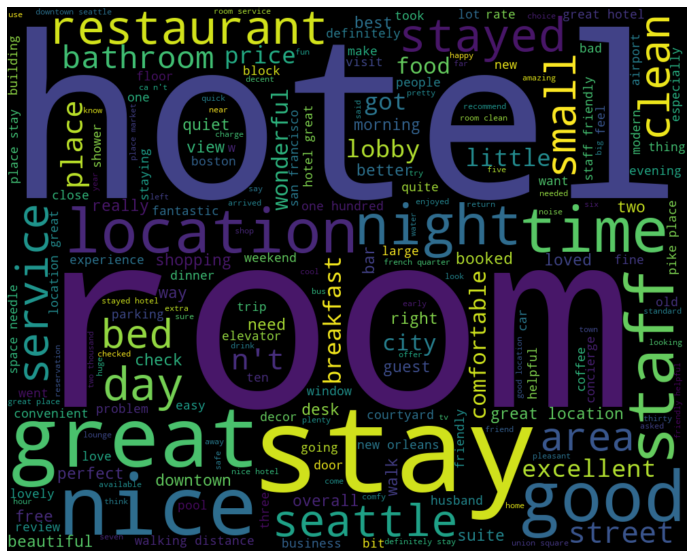

In [ ]:
## ROBERTa for positive

Rbert_pos = " ".join([x for x in trip_1000_sentence_map_Rbert_pos['sentence_reviews']])
wc1= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(Rbert_pos)
plt.figure(figsize=(15,10))
plt.imshow(wc1,interpolation='bilinear')
plt.axis('off')
plt.show()

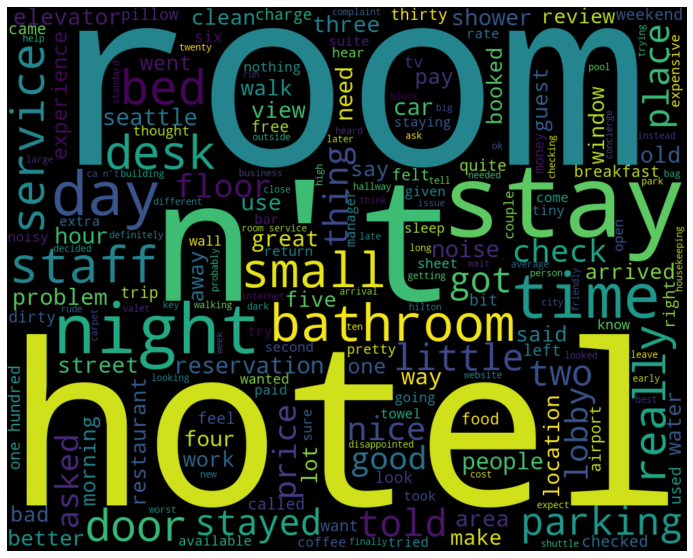

In [ ]:
## ROBERTa for negative

Rbert_neg = " ".join([x for x in trip_1000_sentence_map_Rbert_neg['sentence_reviews']])
wc2= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(Rbert_neg)
plt.figure(figsize=(15,10))
plt.imshow(wc2,interpolation='bilinear')
plt.axis('off')
plt.show()

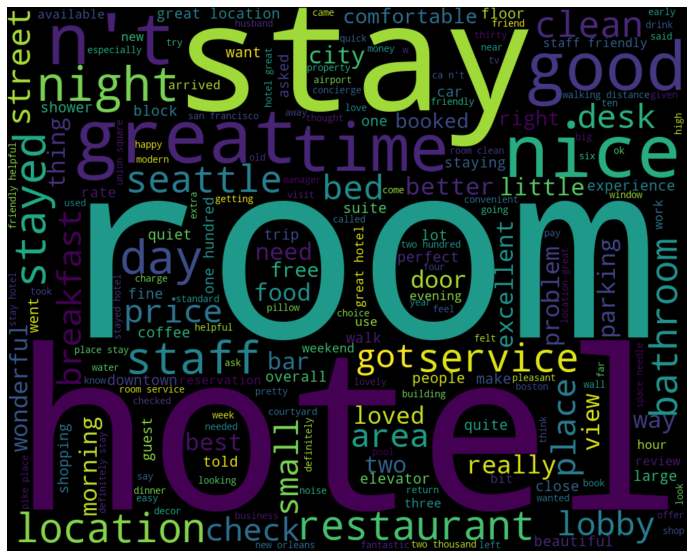

In [ ]:
## TextBlob for positive

Tblob_pos = " ".join([x for x in trip_1000_sentence_map_tblob_pos['sentence_reviews']])
wc3= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(Tblob_pos)
plt.figure(figsize=(15,10))
plt.imshow(wc3,interpolation='bilinear')
plt.axis('off')
plt.show()

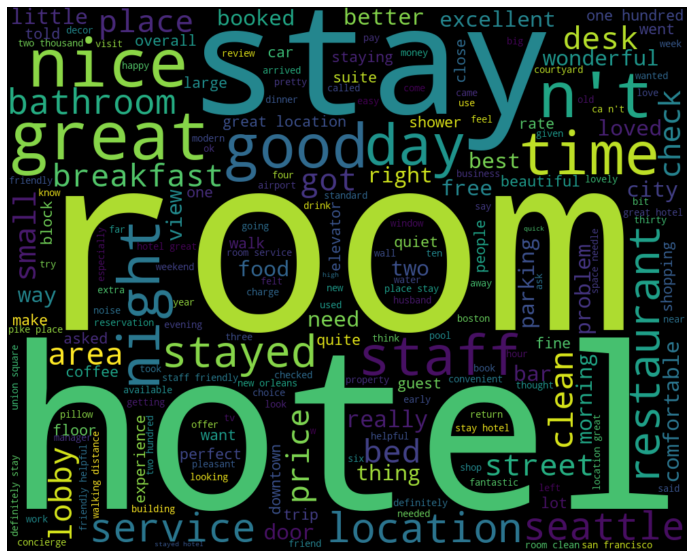

In [ ]:
## TextBlob for Negative
Tblob_neg = " ".join([x for x in trip_1000_sentence_map_tblob_pos['sentence_reviews']])
wc4= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(Tblob_neg)
plt.figure(figsize=(15,10))
plt.imshow(wc4,interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


POSITIVE    6517
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

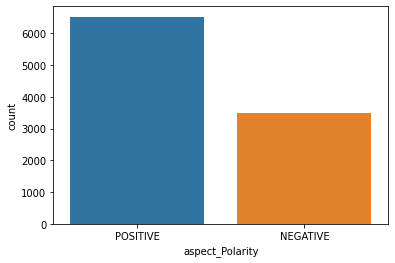

In [ ]:
import seaborn as sns
sns.countplot(trip_1000_sentence_map_Rbert.aspect_Polarity)
trip_1000_sentence_map_Rbert['aspect_Polarity'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


pos    8472
neg    1531
Name: aspect_Sentiment, dtype: int64

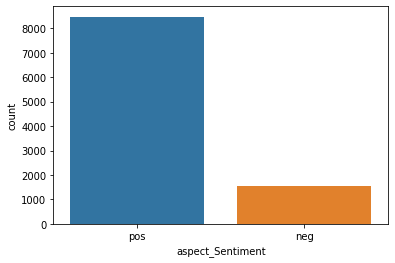

In [ ]:
sns.countplot(trip_1000_sentence_map_tblob.aspect_Sentiment)
trip_1000_sentence_map_tblob['aspect_Sentiment'].value_counts()